<a href="https://colab.research.google.com/github/Gourav709/ST_ML_1/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opendatasets


In [2]:
import opendatasets as od


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gouravvaranasi","key":"724a23b5cd541193594318f7a1bd7933"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 234MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


✅ Dataset loaded.
📊 Shape: (1460, 81)

🔍 Top 10 columns with missing values:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

📈 Model Evaluation:
R² Score: 0.6436
RMSE: 52282.56


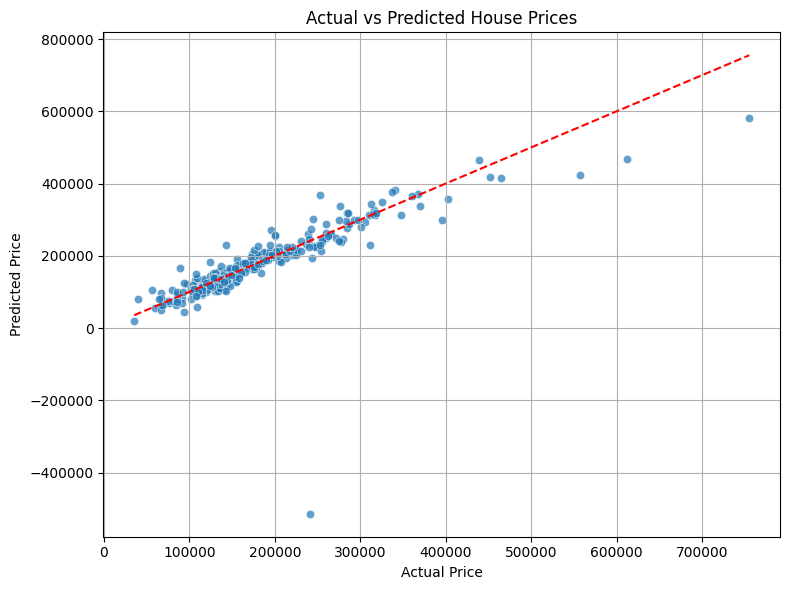

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('train.csv')
print("✅ Dataset loaded.")
print("📊 Shape:", df.shape)

# Check for missing values
print("\n🔍 Top 10 columns with missing values:\n")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Drop columns with too many missing values or irrelevant ones
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Id'], axis=1, inplace=True)

# Fill remaining missing values with column medians (only numeric columns)
df.fillna(df.median(numeric_only=True), inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define feature matrix X and target vector y
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Evaluation:")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

# Plot Actual vs Predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()